In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
numerical_features = df.select_dtypes(include = ['int', 'float']).columns.to_list()
categorical_features = df.select_dtypes(exclude = ['int', 'float']).columns.to_list()

In [ ]:
print('Numerical Features:', numerical_features)
print('Categorical Features:', categorical_features)

Numerical Features: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Features: ['Sex', 'Cabin', 'Embarked']


In [ ]:
continuous_features = [feature for feature in numerical_features if df[feature].nunique()>25]
discrete_features = [feature for feature in numerical_features if df[feature].nunique()<25]

In [ ]:
print('Continuous Features:', continuous_features)
print('Discrete Features:', discrete_features)

Continuous Features: ['Age', 'Fare']
Discrete Features: ['Survived', 'Pclass', 'SibSp', 'Parch']


In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

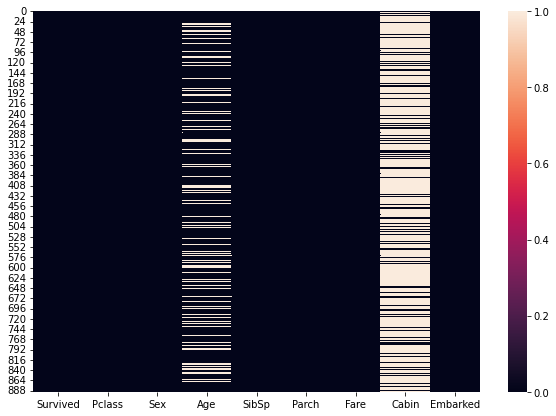

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull())
plt.show()

In [ ]:
print("Percentage Missing: ",df['Age'].isnull().mean()*100)

Percentage Missing:  19.865319865319865


In [ ]:
print("Percentage Missing: ",df['Cabin'].isnull().mean()*100)

Percentage Missing:  77.10437710437711


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


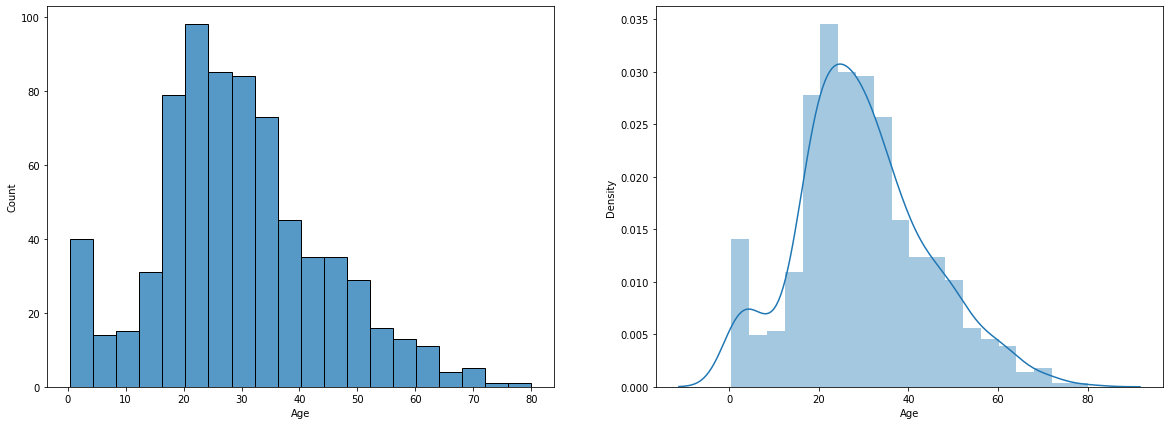

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.histplot(df['Age'])
plt.subplot(1,2,2)
sns.distplot(df['Age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


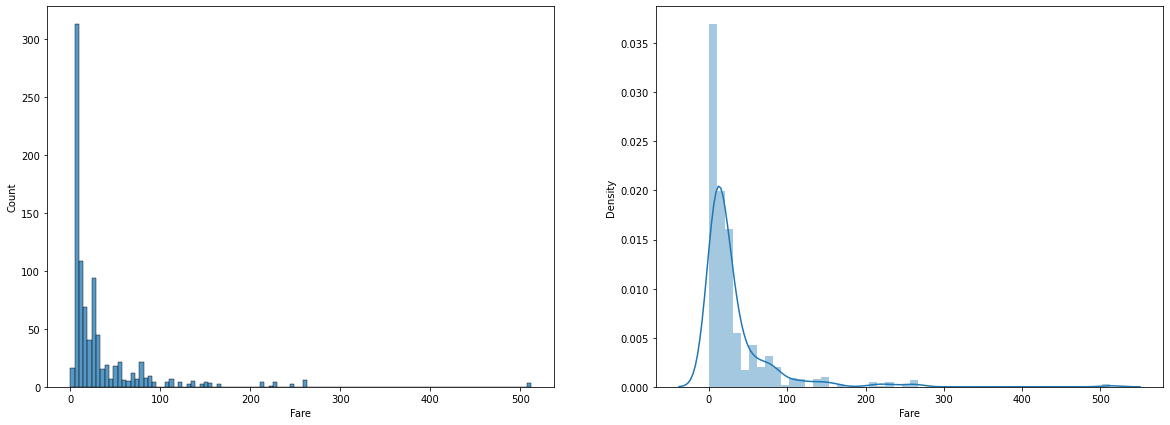

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.histplot(df['Fare'])
plt.subplot(1,2,2)
sns.distplot(df['Fare'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

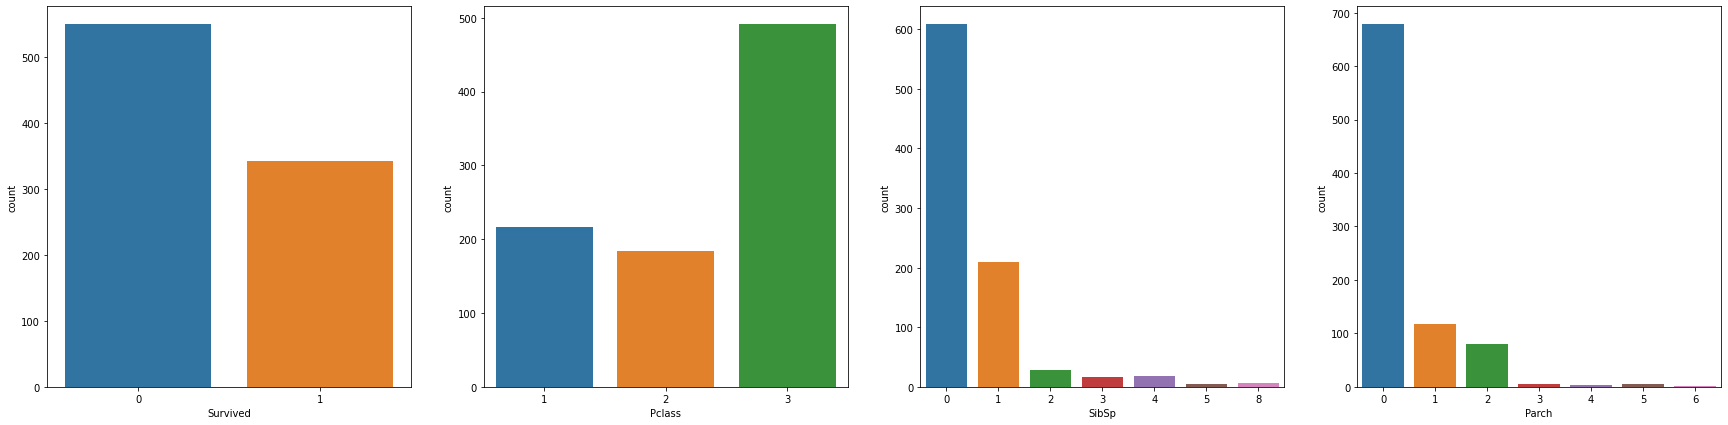

In [ ]:
plt.figure(figsize=(30,7))
plt.subplot(1,4,1)
sns.countplot(df['Survived'])
plt.subplot(1,4,2)
sns.countplot(df['Pclass'])
plt.subplot(1,4,3)
sns.countplot(df['SibSp'])
plt.subplot(1,4,4)
sns.countplot(df['Parch'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


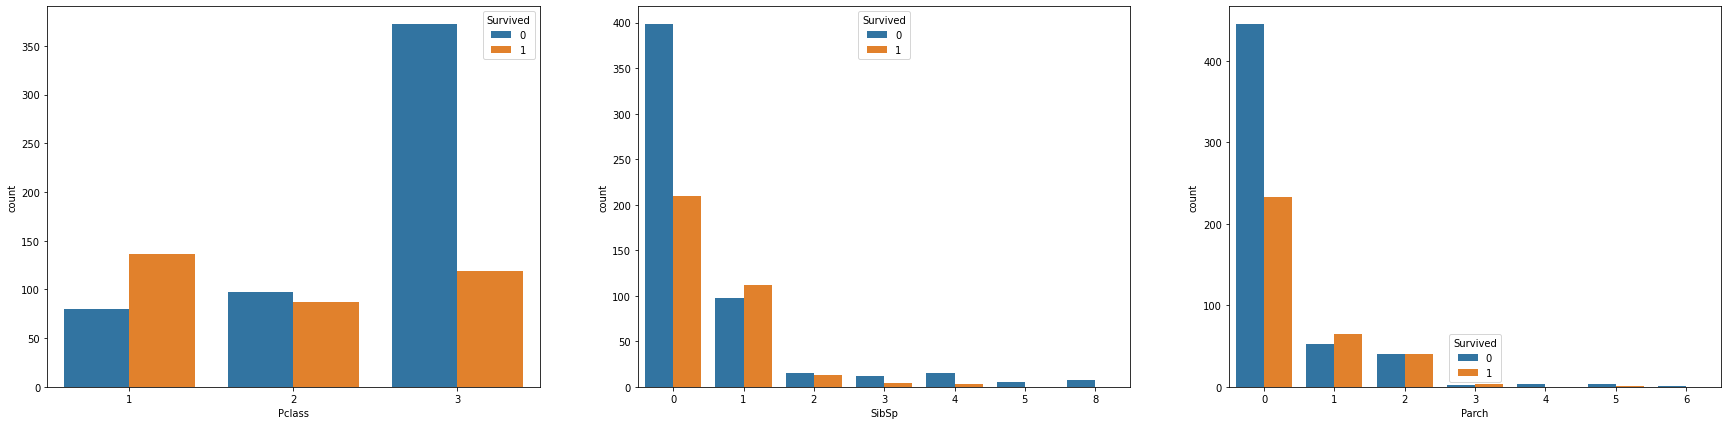

In [ ]:
plt.figure(figsize=(30,7))
plt.subplot(1,3,1)
sns.countplot(df['Pclass'], hue=df['Survived'])
plt.subplot(1,3,2)
sns.countplot(df['SibSp'], hue=df['Survived'])
plt.subplot(1,3,3)
sns.countplot(df['Parch'], hue=df['Survived'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

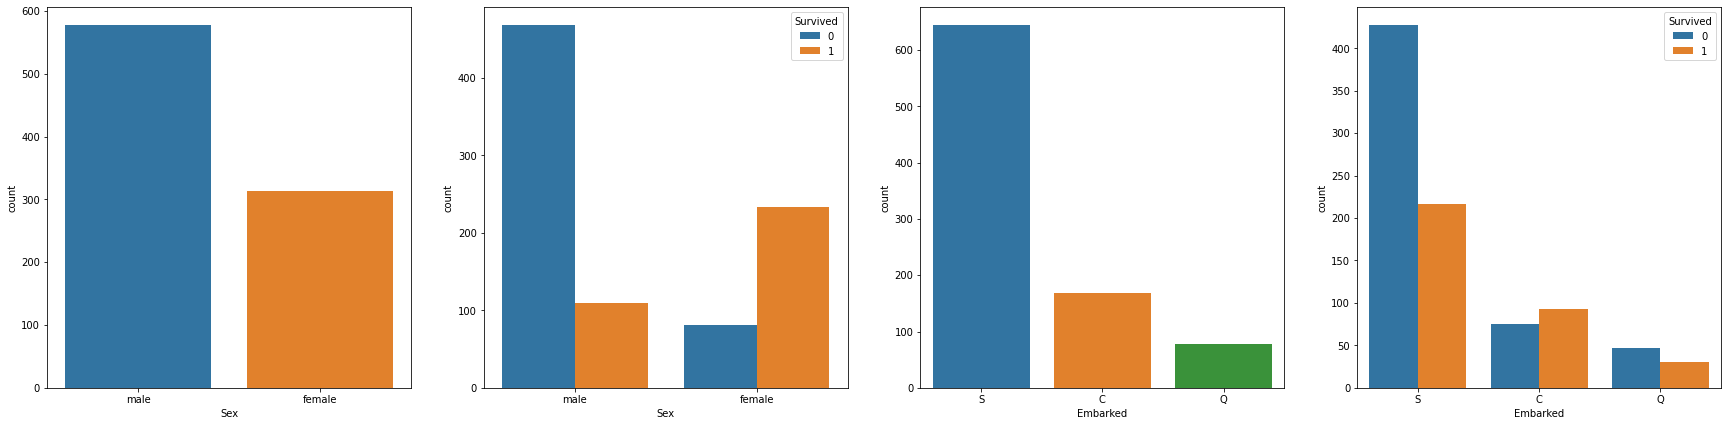

In [ ]:
plt.figure(figsize=(30,7))
plt.subplot(1,4,1)
sns.countplot(df['Sex'])
plt.subplot(1,4,2)
sns.countplot(df['Sex'], hue=df['Survived'])
plt.subplot(1,4,3)
sns.countplot(df['Embarked'])
plt.subplot(1,4,4)
sns.countplot(df['Embarked'], hue=df['Survived'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


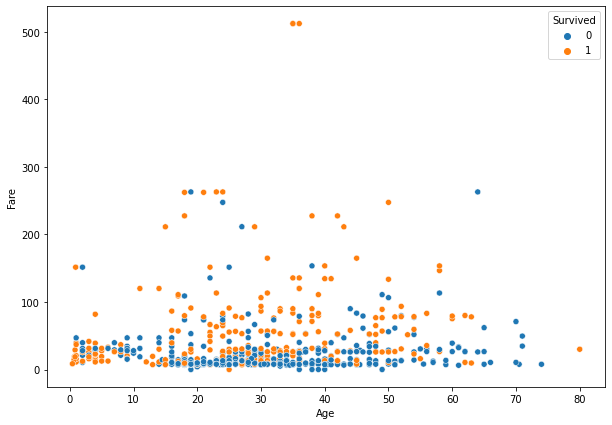

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(df['Age'], df['Fare'], hue=df['Survived'])
plt.show()

<Figure size 2160x504 with 0 Axes>

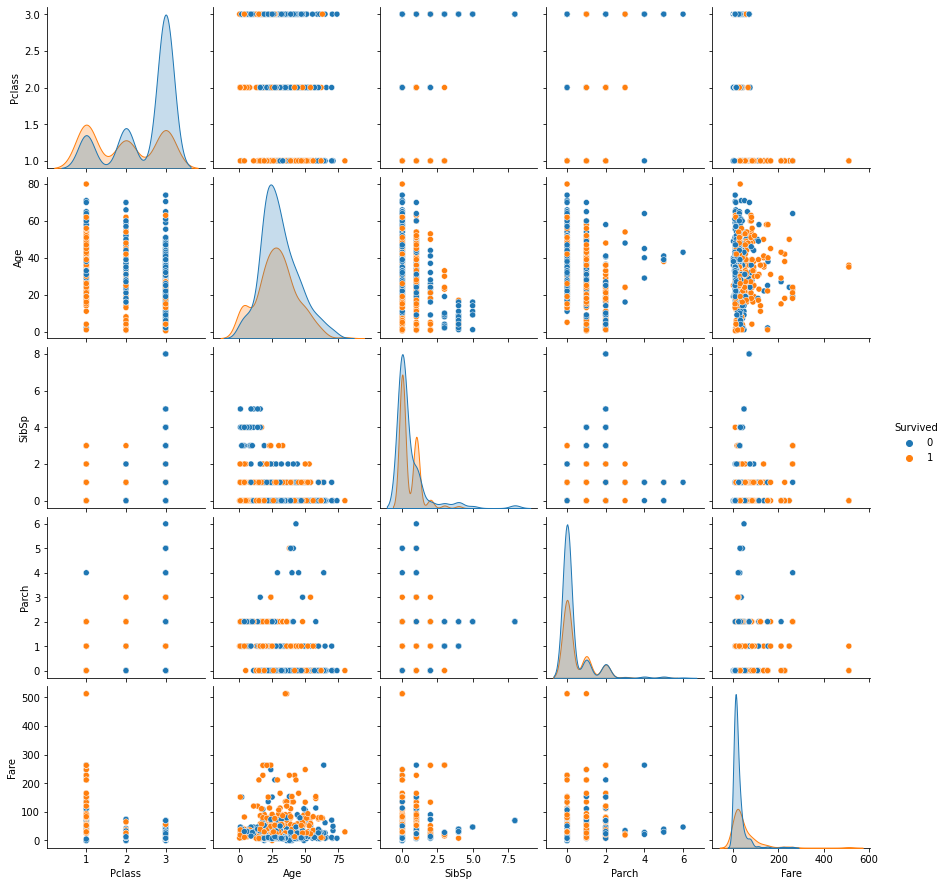

In [ ]:
plt.figure(figsize=(30,7))
sns.pairplot(df, hue='Survived')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


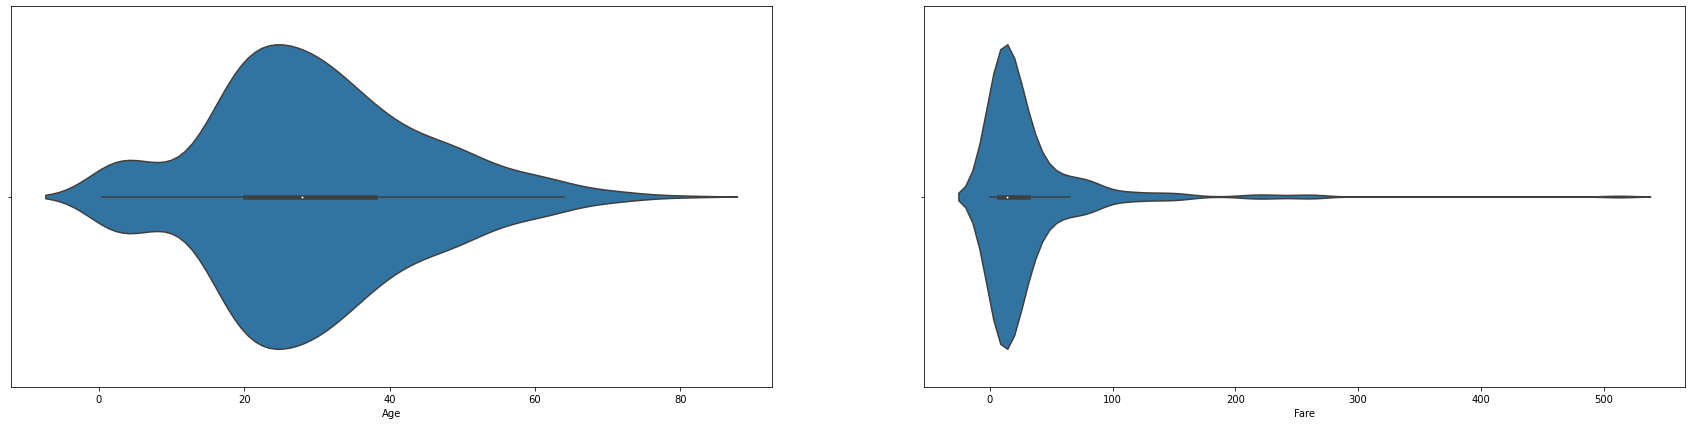

In [ ]:
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.violinplot(df['Age'])
plt.subplot(1,2,2)
sns.violinplot(df['Fare'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


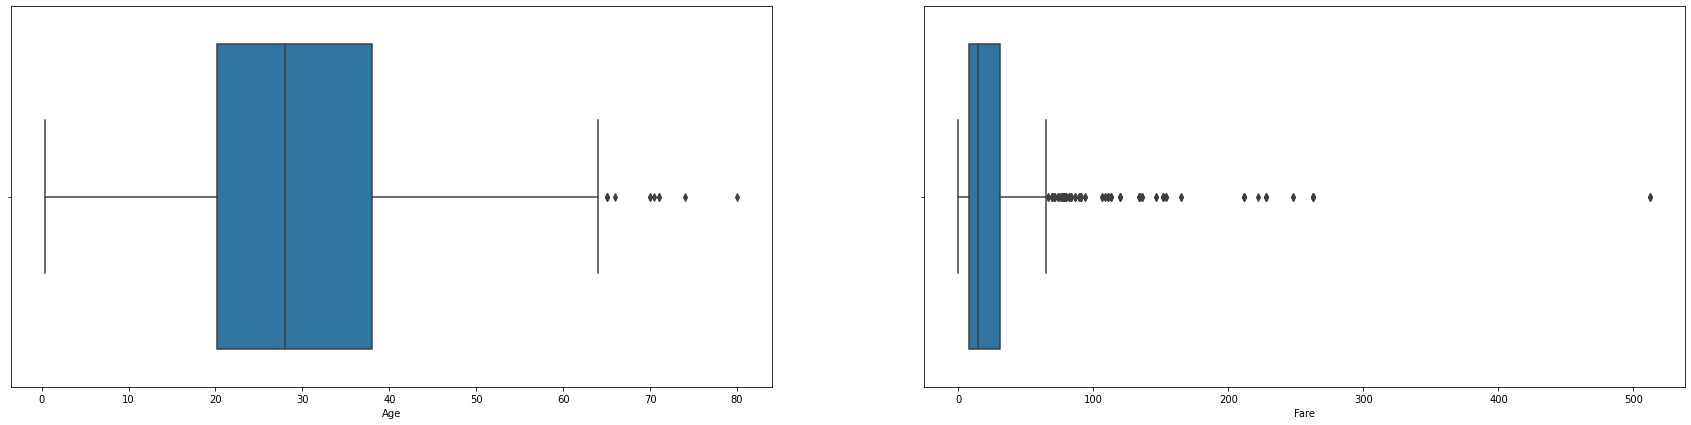

In [ ]:
plt.figure(figsize=(30,7))
plt.subplot(1,2,1)
sns.boxplot(df['Age'])
plt.subplot(1,2,2)
sns.boxplot(df['Fare'])
plt.show()

In [ ]:
def outlier(feature):
  IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
  LB = df[feature].quantile(0.25) - 1.5*IQR
  UB = df[feature].quantile(0.75) + 1.5*IQR
  print("LOWER BOUNDARY: ", LB)
  print("UPPER BOUNDARY:", UB)

In [ ]:
print(df['Age'].describe())
outlier('Age')

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
LOWER BOUNDARY:  -6.6875
UPPER BOUNDARY: 64.8125


In [ ]:
len(df[df['Age']>64.8125])

11

In [ ]:
print(df['Fare'].describe())
outlier('Fare')

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
LOWER BOUNDARY:  -26.724
UPPER BOUNDARY: 65.6344


In [ ]:
len(df[df['Fare']>65.6344])

116

In [ ]:
df['Age_NaN'] = np.where(df['Age'].isnull(), 1, 0)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_NaN
0,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0


In [ ]:
df[df['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_NaN
5,0,3,male,NaN,0,0,8.4583,NaN,Q,1
17,1,2,male,NaN,0,0,13.0000,NaN,S,1
19,1,3,female,NaN,0,0,7.2250,NaN,C,1
26,0,3,male,NaN,0,0,7.2250,NaN,C,1
28,1,3,female,NaN,0,0,7.8792,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,NaN,C,1
863,0,3,female,NaN,8,2,69.5500,NaN,S,1
868,0,3,male,NaN,0,0,9.5000,NaN,S,1
878,0,3,male,NaN,0,0,7.8958,NaN,S,1


In [ ]:
mean = df['Age'].mean()
df['Age'].fillna(mean, axis=0, inplace=True)

In [ ]:
df.Age.isnull().sum()

0

In [ ]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df.Cabin.nunique()

147

In [ ]:
df.Cabin.isnull().sum()

687

In [ ]:
df.Cabin.isnull().describe()

count      891
unique       2
top       True
freq       687
Name: Cabin, dtype: object

In [ ]:
df['Cabin_NaN'] = np.where(df.Cabin.isnull(), 1, 0)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_NaN,Cabin_NaN
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,1


In [ ]:
df.Cabin.fillna('Missing', axis=0, inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_NaN,Cabin_NaN
0,0,3,male,22.0,1,0,7.2500,Missing,S,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,0,0
2,1,3,female,26.0,0,0,7.9250,Missing,S,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,0,0
4,0,3,male,35.0,0,0,8.0500,Missing,S,0,1


In [ ]:
df['Cabin'] = df.Cabin.str[0]

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_NaN,Cabin_NaN
0,0,3,male,22.0,1,0,7.2500,M,S,0,1
1,1,1,female,38.0,1,0,71.2833,C,C,0,0
2,1,3,female,26.0,0,0,7.9250,M,S,0,1
3,1,1,female,35.0,1,0,53.1000,C,S,0,0
4,0,3,male,35.0,0,0,8.0500,M,S,0,1


In [ ]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


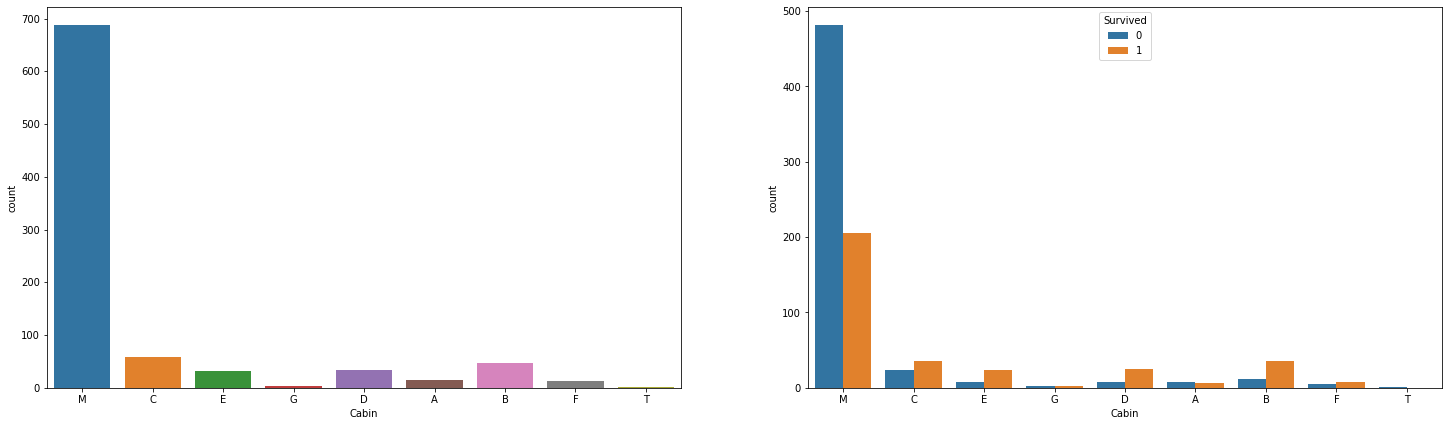

In [ ]:
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.countplot(df.Cabin)
plt.subplot(1,2,2)
sns.countplot(df.Cabin, hue=df['Survived'])
plt.show()

In [ ]:
df_sex = pd.get_dummies(df['Sex'], drop_first=True)
df_sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
df_cabin = pd.get_dummies(df['Cabin'])
df_cabin.head()

,A,B,C,D,E,F,G,M,T
0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0


In [ ]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df.Embarked.isnull().sum()

2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


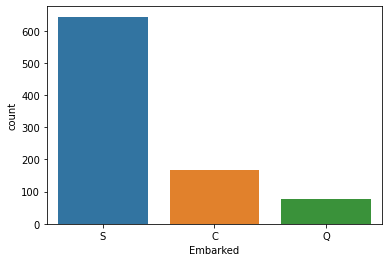

In [ ]:
sns.countplot(df.Embarked)

In [ ]:
df.Embarked.mode()[0]

'S'

In [ ]:
df.Embarked.fillna(df.Embarked.mode()[0], axis=0, inplace=True)

In [ ]:
df.Embarked.isnull().sum()

0

In [ ]:
df_embarked = pd.get_dummies(df.Embarked)

In [ ]:
df_embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
df_new = pd.concat([df, df_sex, df_cabin, df_embarked], axis=1)

In [ ]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_NaN,...,C,D,E,F,G,M,T,C,Q,S
0,0,3,male,22.0,1,0,7.2500,M,S,0,...,0,0,0,0,0,1,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,C,0,...,1,0,0,0,0,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,M,S,0,...,0,0,0,0,0,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,C,S,0,...,1,0,0,0,0,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,M,S,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
df_new.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Age_NaN', 'Cabin_NaN', 'male', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'M', 'T', 'C', 'Q', 'S'],
      dtype='object')

In [ ]:
df_new.drop(['Sex', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_NaN,Cabin_NaN,male,A,...,C,D,E,F,G,M,T,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
df_new.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_NaN,Cabin_NaN,male,A,...,C,D,E,F,G,M,T,C,Q,S
Survived,1.000000,-0.338481,-6.980852e-02,-0.035322,0.081629,0.257307,-9.219652e-02,-0.316912,-0.543351,0.022287,...,0.114652,0.150716,0.145321,0.057935,0.016040,-0.316912,-0.026456,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-3.313388e-01,0.083081,0.018443,-0.549500,1.729329e-01,0.725541,0.131900,-0.204934,...,-0.417048,-0.278690,-0.230091,0.011063,0.055561,0.725541,-0.052496,-0.243292,0.221009,0.074053
Age,-0.069809,-0.331339,1.000000e+00,-0.232625,-0.179191,0.091566,-1.303789e-16,-0.233123,0.084153,0.121920,...,0.113149,0.132319,0.117211,-0.077209,-0.077253,-0.233123,0.039469,0.032024,-0.013855,-0.019336
SibSp,-0.035322,0.083081,-2.326246e-01,1.000000,0.414838,0.159651,1.895757e-02,0.040460,-0.114631,-0.046266,...,0.029251,-0.017575,-0.036865,0.001706,-0.001402,0.040460,-0.015907,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-1.791909e-01,0.414838,1.000000,0.216225,-1.241038e-01,-0.036987,-0.245489,-0.040325,...,0.030736,-0.019125,-0.016554,0.023694,0.072388,-0.036987,-0.015878,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,9.156609e-02,0.159651,0.216225,1.000000,-1.007071e-01,-0.482075,-0.182333,0.019549,...,0.364318,0.098878,0.053717,-0.033093,-0.025180,-0.482075,0.002224,0.269335,-0.117216,-0.162184
Age_NaN,-0.092197,0.172933,-1.303789e-16,0.018958,-0.124104,-0.100707,1.000000e+00,0.144111,0.055215,0.000442,...,-0.042088,-0.067855,-0.065864,-0.013665,-0.033435,0.144111,-0.016689,0.033270,0.337413,-0.241480
Cabin_NaN,-0.316912,0.725541,-2.331227e-01,0.040460,-0.036987,-0.482075,1.441109e-01,1.000000,0.140391,-0.240136,...,-0.488683,-0.359896,-0.354194,-0.223299,-0.123234,1.000000,-0.061513,-0.208528,0.129572,0.101139
male,-0.543351,0.131900,8.415344e-02,-0.114631,-0.245489,-0.182333,5.521512e-02,0.140391,1.000000,0.078271,...,-0.058649,-0.079248,-0.047003,-0.008202,-0.091031,0.140391,0.024728,-0.082853,-0.074115,0.119224
A,0.022287,-0.204934,1.219205e-01,-0.046266,-0.040325,0.019549,4.417119e-04,-0.240136,0.078271,1.000000,...,-0.034846,-0.025663,-0.025256,-0.015923,-0.008787,-0.240136,-0.004386,0.093040,-0.040246,-0.056180


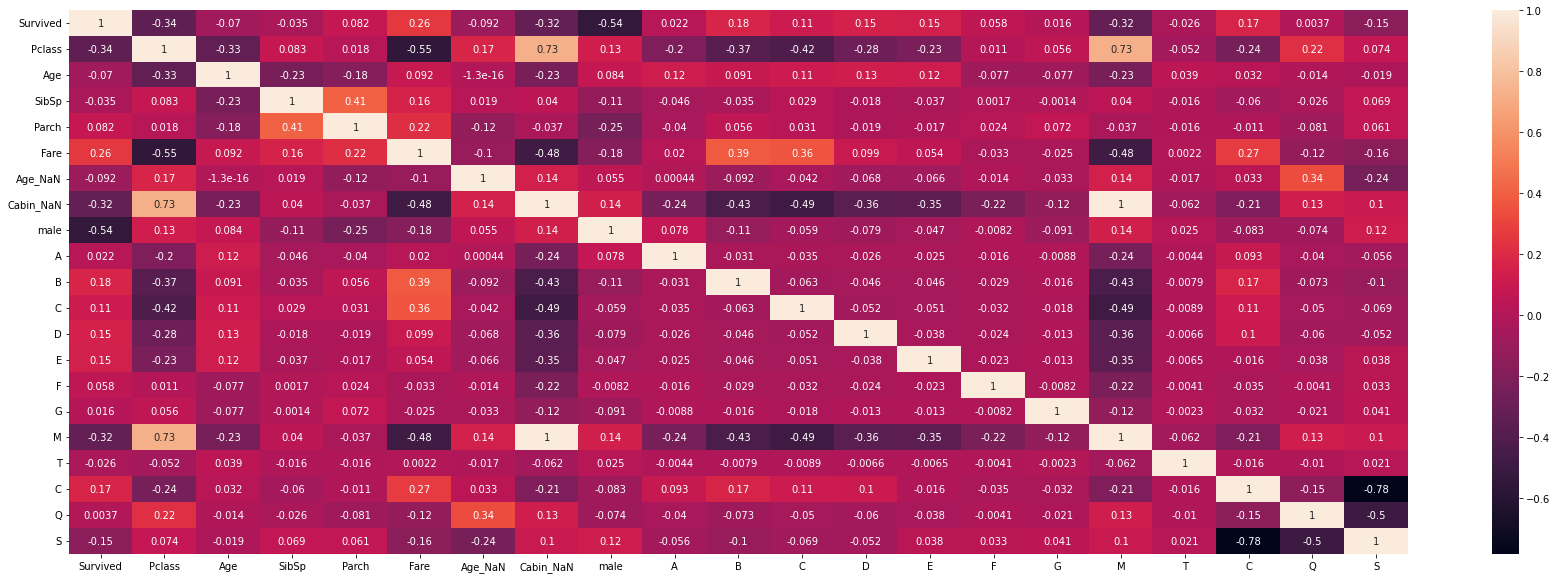

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(df_new.corr(), annot=True)

In [ ]:
df_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_NaN,Cabin_NaN,male,A,...,C,D,E,F,G,M,T,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Age        891 non-null    float64
 3   SibSp      891 non-null    int64  
 4   Parch      891 non-null    int64  
 5   Fare       891 non-null    float64
 6   Age_NaN    891 non-null    int64  
 7   Cabin_NaN  891 non-null    int64  
 8   male       891 non-null    uint8  
 9   A          891 non-null    uint8  
 10  B          891 non-null    uint8  
 11  C          891 non-null    uint8  
 12  D          891 non-null    uint8  
 13  E          891 non-null    uint8  
 14  F          891 non-null    uint8  
 15  G          891 non-null    uint8  
 16  M          891 non-null    uint8  
 17  T          891 non-null    uint8  
 18  C          891 non-null    uint8  
 19  Q          891 non-null    uint8  
 20  S         

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


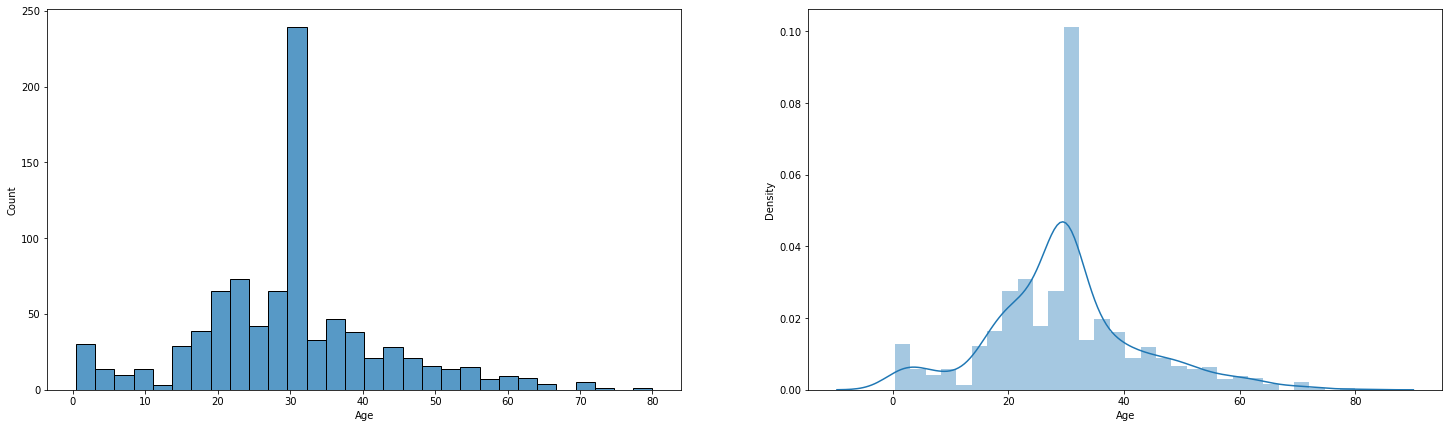

In [ ]:
plt.figure(figsize = (25,7))
plt.subplot(1,2,1)
sns.histplot(df_new['Age'])
plt.subplot(1,2,2)
sns.distplot(df_new['Age'])
plt.show()

In [ ]:
X = df_new.drop('Survived', axis=1)
y = df_new['Survived']

In [ ]:
X

,Pclass,Age,SibSp,Parch,Fare,Age_NaN,Cabin_NaN,male,A,B,C,D,E,F,G,M,T,C,Q,S
0,3,22.000000,1,0,7.2500,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
1,1,38.000000,1,0,71.2833,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,26.000000,0,0,7.9250,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,35.000000,1,0,53.1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
887,1,19.000000,0,0,30.0000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
888,3,29.699118,1,2,23.4500,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

order_rank = SelectKBest(score_func=chi2, k=12)
order_feature = order_rank.fit(X,y)

dfscores = pd.DataFrame(order_feature.scores_, columns = ["Score"])
dfcolumns = pd.DataFrame(X.columns)

features_rank = pd.concat([dfcolumns,dfscores],axis=1)

features_rank.columns = ['Features','Score']

In [ ]:
features_rank

,Features,Score
0,Pclass,30.873699
1,Age,24.687926
2,SibSp,2.581865
3,Parch,10.097499
4,Fare,4518.319091
5,Age_NaN,6.069142
6,Cabin_NaN,20.488314
7,male,92.702447
8,A,0.435116
9,B,25.875581


In [ ]:
features_rank.nlargest(10, 'Score')

,Features,Score
4,Fare,4518.319091
7,male,92.702447
0,Pclass,30.873699
9,B,25.875581
1,Age,24.687926
6,Cabin_NaN,20.488314
15,M,20.488314
17,C,20.464401
11,D,19.489646
12,E,18.140638


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model=ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

[0.07248338 0.21082446 0.04943897 0.04106638 0.21822359 0.01644642
 0.0286073  0.26578337 0.00312119 0.00641308 0.00555472 0.00615503
 0.00802127 0.00281787 0.00139453 0.03327407 0.00058917 0.01149701
 0.00591565 0.01237255]


In [ ]:
ranked_features = pd.Series(model.feature_importances_, index = X.columns)

In [ ]:
ranked_features

Pclass       0.072483
Age          0.210824
SibSp        0.049439
Parch        0.041066
Fare         0.218224
Age_NaN      0.016446
Cabin_NaN    0.028607
male         0.265783
A            0.003121
B            0.006413
C            0.005555
D            0.006155
E            0.008021
F            0.002818
G            0.001395
M            0.033274
T            0.000589
C            0.011497
Q            0.005916
S            0.012373
dtype: float64

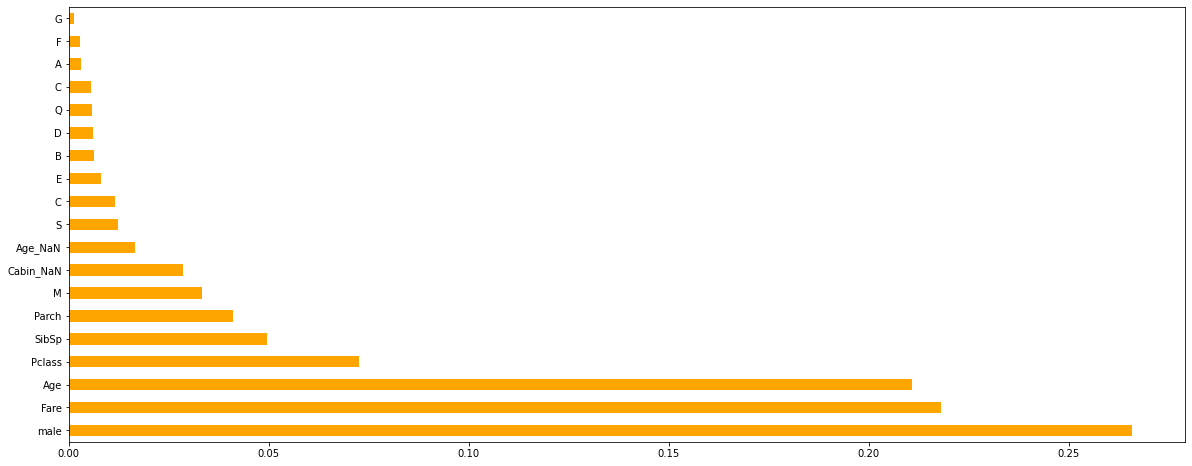

In [ ]:
plt.figure(figsize = (20,8))
ranked_features.nlargest(19).plot(kind='barh', color='orange')
plt.show()

In [ ]:
X = df_new[['male', 'Fare', 'Age', 'Pclass', 'SibSp', 'Parch']]
y = df_new['Survived']

In [ ]:
X

,male,Fare,Age,Pclass,SibSp,Parch
0,1,7.2500,22.000000,3,1,0
1,0,71.2833,38.000000,1,1,0
2,0,7.9250,26.000000,3,0,0
3,0,53.1000,35.000000,1,1,0
4,1,8.0500,35.000000,3,0,0
...,...,...,...,...,...,...
886,1,13.0000,27.000000,2,0,0
887,0,30.0000,19.000000,1,0,0
888,0,23.4500,29.699118,3,1,2
889,1,30.0000,26.000000,1,0,0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 6), (712,), (179, 6), (179,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.74926865, -0.43307042, -1.32013521,  0.82831288,  0.44200774,
        -0.46742617],
       [ 0.74926865,  2.38210185, -2.15236823, -1.54019624,  0.44200774,
         1.9355156 ],
       [ 0.74926865, -0.51708921,  1.60920487,  0.82831288, -0.4755127 ,
        -0.46742617],
       ...,
       [ 0.74926865, -0.50020319, -0.4187998 ,  0.82831288, -0.4755127 ,
        -0.46742617],
       [ 0.74926865, -0.39779155,  1.53409359, -0.35594168, -0.4755127 ,
        -0.46742617],
       [ 0.74926865, -0.65862601,  0.00926824, -1.54019624, -0.4755127 ,
        -0.46742617]])

In [ ]:
X_test_scaled

array([[-1.33463478,  0.50467962,  1.08342588, -1.54019624, -0.4755127 ,
         0.73404471],
       [ 0.74926865, -0.50337935,  0.00926824,  0.82831288, -0.4755127 ,
        -0.46742617],
       [ 0.74926865, -0.36769527,  0.00926824,  0.82831288, -0.4755127 ,
        -0.46742617],
       ...,
       [ 0.74926865, -0.49710929,  1.60920487,  0.82831288, -0.4755127 ,
        -0.46742617],
       [ 0.74926865, -0.36853195,  0.00926824,  0.82831288, -0.4755127 ,
        -0.46742617],
       [ 0.74926865, -0.1369571 ,  0.33231304, -0.35594168,  0.44200774,
        -0.46742617]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Let's implement simple classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    training_score = cross_val_score(classifier, X_train_scaled, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 78.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 79.0 % accuracy score
Classifiers:  SVC Has a training score of 82.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 77.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 82.0 % accuracy score


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, refit=True, verbose=4)
grid_log_reg.fit(X_train_scaled, y_train)
print(grid_log_reg.best_params_)
print(grid_log_reg.best_estimator_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.629 total time=   0.0s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.636 total time=   0.0s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.641 total time=   0.0s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.627 total time=   0.0s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.641 total time=   0.0s
[CV 1/5] END ................C=0.01, penalty=l2;, score=0.769 total time=   0.0s
[CV 2/5] END ................C=0.01, penalty=l2;, score=0.818 total time=   0.0s
[CV 3/5] END ................C=0.01, penalty=l2;, score=0.775 total time=   0.0s
[CV 4/5] END ................C=0.01, penalty=l2;, score=0.796 total time=   0.0s
[CV 5/5] END ................C=0.01, penalty=l2;, score=0.810 total time=   0.0s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.790 total time=   0.0s
[CV 2/5] END .................C=0.1, penalty=l2;,

accuracy: 0.8156424581005587
classification report:
               precision    recall  f1-score   support

           0       0.79      0.95      0.86       109
           1       0.89      0.60      0.72        70

    accuracy                           0.82       179
   macro avg       0.84      0.78      0.79       179
weighted avg       0.83      0.82      0.81       179



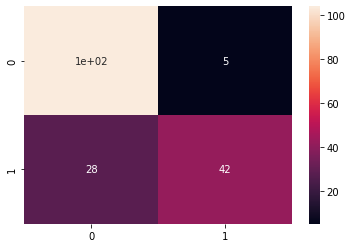

In [ ]:
grid_log_reg_predictions = grid_log_reg.predict(X_test_scaled)
cm = confusion_matrix(y_test, grid_log_reg_predictions)
accuracy = accuracy_score(y_test, grid_log_reg_predictions)
class_report = classification_report(y_test, grid_log_reg_predictions)
sns.heatmap(cm, annot=True)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

In [ ]:
# svc_param = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']} 
svc_param = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']} 
grid_svc = GridSearchCV(SVC(), svc_param, refit=True, verbose=4)
grid_svc.fit(X_train_scaled, y_train)
print(grid_svc.best_params_)
print(grid_svc.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.790 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.797 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.782 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.803 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.804 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.790 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.768 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.734 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

accuracy: 0.8547486033519553
classification report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       109
           1       0.88      0.73      0.80        70

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



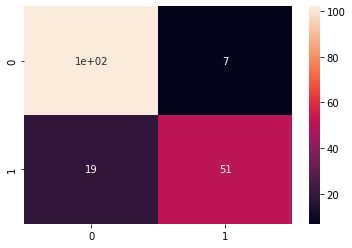

In [ ]:
grid_svc_predictions = grid_svc.predict(X_test_scaled)
cm = confusion_matrix(y_test, grid_svc_predictions)
accuracy = accuracy_score(y_test, grid_svc_predictions)
class_report = classification_report(y_test, grid_svc_predictions)
sns.heatmap(cm, annot=True)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

In [ ]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params, refit=True, verbose=4)
grid_knears.fit(X_train_scaled, y_train)
print(grid_knears.best_params_)
print(grid_knears.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....algorithm=auto, n_neighbors=2;, score=0.804 total time=   0.0s
[CV 2/5] END .....algorithm=auto, n_neighbors=2;, score=0.762 total time=   0.0s
[CV 3/5] END .....algorithm=auto, n_neighbors=2;, score=0.754 total time=   0.0s
[CV 4/5] END .....algorithm=auto, n_neighbors=2;, score=0.852 total time=   0.0s
[CV 5/5] END .....algorithm=auto, n_neighbors=2;, score=0.831 total time=   0.0s
[CV 1/5] END .....algorithm=auto, n_neighbors=3;, score=0.762 total time=   0.0s
[CV 2/5] END .....algorithm=auto, n_neighbors=3;, score=0.797 total time=   0.0s
[CV 3/5] END .....algorithm=auto, n_neighbors=3;, score=0.754 total time=   0.0s
[CV 4/5] END .....algorithm=auto, n_neighbors=3;, score=0.852 total time=   0.0s
[CV 5/5] END .....algorithm=auto, n_neighbors=3;, score=0.803 total time=   0.0s
[CV 1/5] END .....algorithm=auto, n_neighbors=4;, score=0.776 total time=   0.0s
[CV 2/5] END .....algorithm=auto, n_neighbors=4;

accuracy: 0.7988826815642458
classification report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       109
           1       0.83      0.61      0.70        70

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



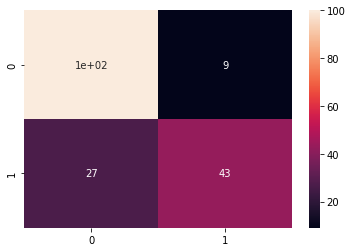

In [ ]:
grid_kn_predictions = grid_knears.predict(X_test_scaled)
cm = confusion_matrix(y_test, grid_kn_predictions)
accuracy = accuracy_score(y_test, grid_kn_predictions)
class_report = classification_report(y_test, grid_kn_predictions)
sns.heatmap(cm, annot=True)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

In [ ]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, refit=True, verbose=4)
grid_tree.fit(X_train_scaled, y_train)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=5;, score=0.776 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=5;, score=0.797 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=5;, score=0.732 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=5;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=5;, score=0.831 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=6;, score=0.776 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=6;, score=0.797 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=6;, score=0.732 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=6;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=6;, score=0.831 total time=   0.0s


accuracy: 0.8268156424581006
classification report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       109
           1       0.83      0.70      0.76        70

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



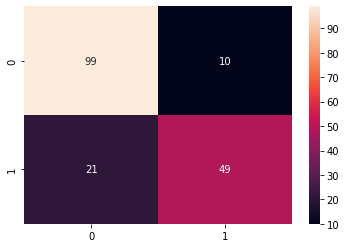

In [ ]:
grid_dt_predictions = grid_tree.predict(X_test_scaled)
cm = confusion_matrix(y_test, grid_dt_predictions)
accuracy = accuracy_score(y_test, grid_dt_predictions)
class_report = classification_report(y_test, grid_dt_predictions)
sns.heatmap(cm, annot=True)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

In [ ]:
# randomforest_params = {'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
randomforest_params = {'bootstrap': [True, False], 'max_depth': [10, 20], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [200, 400]}
grid_rf = GridSearchCV(RandomForestClassifier(), randomforest_params, refit=True, verbose=4)
grid_rf.fit(X_train_scaled, y_train)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.818 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.839 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.817 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.866 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.838 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.818 total time=   0.7s
[CV 2/5] END bootstr

accuracy: 0.8491620111731844
classification report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.88       109
           1       0.88      0.71      0.79        70

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



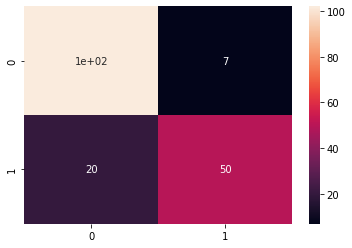

In [ ]:
grid_rf_predictions = grid_rf.predict(X_test_scaled)
cm = confusion_matrix(y_test, grid_rf_predictions)
accuracy = accuracy_score(y_test, grid_rf_predictions)
class_report = classification_report(y_test, grid_rf_predictions)
sns.heatmap(cm, annot=True)
print('accuracy:', accuracy)
print('classification report:\n', class_report)